## Building Predictive Models (part 1)
Supervised learning with classification and regression

### Functions p.4

In [1]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
# from sklearn.linear_model import Perceptron
from sklearn.preprocessing import StandardScaler
from Data.Perceptron import Perceptron
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression


In [2]:
x = np.arange(9)
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [3]:
result = np.where(x<2)
print(result)

(array([0, 1], dtype=int64),)


In [4]:
result = np.where(x == 0, 'YES', 'no')
print(result)

['YES' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no']


### Train-test split with sklearn p.23

In [5]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [6]:
my_test_size = 0.3
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=my_test_size)

In [7]:
print('size of train set [%]:', X_train.size / X.size)
print('size of test set [%]:', X_test.size / X.size)

size of train set [%]: 0.7
size of test set [%]: 0.3


In [8]:
def split_dataset(X,y,my_test_size):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=my_test_size)
    
    plt.hist(X[:,0])
    plt.hist(X_train[:,0])
    plt.hist(X_test[:,0])
    plt.legend(['Full set', 'Train set', 'Test set'])
    plt.show()

    return X_train, X_test, y_train, y_test


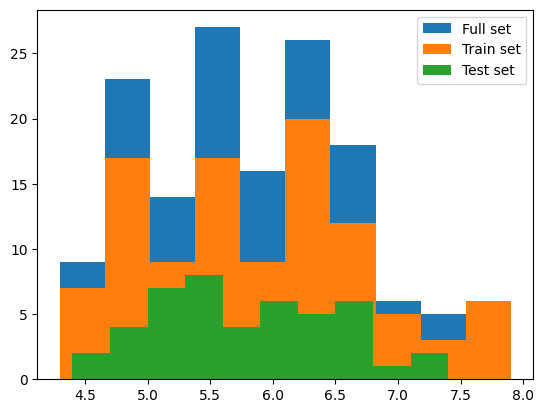

(array([[6.2, 2.8, 4.8, 1.8],
        [7.2, 3. , 5.8, 1.6],
        [6.4, 3.2, 5.3, 2.3],
        [4.9, 2.4, 3.3, 1. ],
        [7.2, 3.2, 6. , 1.8],
        [5.2, 3.5, 1.5, 0.2],
        [5. , 3.5, 1.6, 0.6],
        [6. , 3. , 4.8, 1.8],
        [5.8, 2.8, 5.1, 2.4],
        [7.9, 3.8, 6.4, 2. ],
        [6.5, 3. , 5.5, 1.8],
        [7.7, 3. , 6.1, 2.3],
        [5.7, 4.4, 1.5, 0.4],
        [6.7, 3.1, 4.4, 1.4],
        [6.5, 3.2, 5.1, 2. ],
        [6.7, 3.3, 5.7, 2.1],
        [5.9, 3. , 4.2, 1.5],
        [6.3, 2.8, 5.1, 1.5],
        [5.4, 3.7, 1.5, 0.2],
        [6.1, 2.9, 4.7, 1.4],
        [7.1, 3. , 5.9, 2.1],
        [4.6, 3.1, 1.5, 0.2],
        [5.5, 2.4, 3.7, 1. ],
        [6.4, 2.8, 5.6, 2.1],
        [6.9, 3.1, 5.4, 2.1],
        [6.3, 3.4, 5.6, 2.4],
        [4.8, 3.4, 1.6, 0.2],
        [6.1, 3. , 4.6, 1.4],
        [6.7, 3.1, 5.6, 2.4],
        [4.4, 2.9, 1.4, 0.2],
        [5.1, 3.4, 1.5, 0.2],
        [5.5, 4.2, 1.4, 0.2],
        [5. , 2.3, 3.3, 1. ],
        [5

In [9]:
split_dataset(X,y,my_test_size)

### Classification with plotting p.29

In [10]:
df_iris = pd.read_csv('Data/iris.data', header = None)
df_iris.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
# Select setosa ans versicolor
y = df_iris.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# extract sepal length and petal length
X = df_iris.iloc[0:100, [0,2]].values

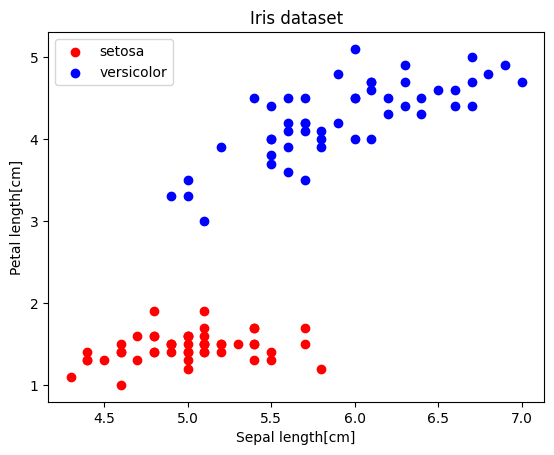

In [12]:
plt.scatter(X[:50,0], X[:50,1], 
            color = 'red', 
            marker = 'o',
            label = 'setosa')
plt.scatter(X[50:100,0], X[50:100,1], 
            color = 'blue', 
            marker = 'o',
            label = 'versicolor')

plt.title('Iris dataset')
plt.xlabel('Sepal length[cm]')
plt.ylabel('Petal length[cm]')
plt.legend(loc = 'upper left')

plt.show()

### Perceptron with sklearn p. 50
activation function, objective function and learning rate

In [13]:
# class Perceptron(object):
#     def __init__(self, eta, n_iter):
#         # Initialization 

#     def fit(self, X, y):
#         # fit training data
    
#     def net_input(self, X):
#         # calculate net input
    
#     def predict(self, X):
#         # return class label

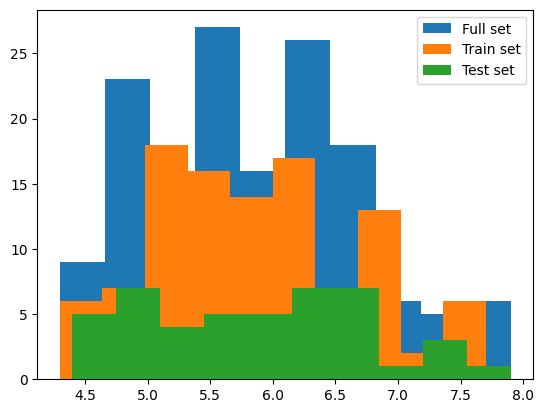

In [14]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = split_dataset(X,y,0.3)

In [15]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [16]:
ppn = Perceptron(eta=0.1)
ppn.fit(X_train_std, y_train)
y_pred = ppn.predict(X_test_std)


In [17]:
print('Misclassified examples: %d'
      % (y_test != y_pred).sum())
print('Accuracy: %.2f'
      % accuracy_score(y_test, y_pred))


Misclassified examples: 30
Accuracy: 0.33


### Logistic regression p.60

In [18]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

my_test_size = 0.3

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=my_test_size)

In [19]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [20]:
lr = LogisticRegression()
lr.fit(X_train_std, y_train)
y_test_pred = lr.predict_proba(X_test_std)*100
y_test_pred = y_test_pred.astype(int)

In [21]:
print('True label:\n', y_test[-5:].reshape(5,1))
print('Predicted probabilities:\n', y_test_pred[-5:])

True label:
 [[1]
 [2]
 [2]
 [0]
 [0]]
Predicted probabilities:
 [[ 9 89  1]
 [ 0 22 77]
 [ 0  2 97]
 [98  1  0]
 [97  2  0]]


### Linearly inseparable data p. 67

In [22]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

    # highlight test samples
    if test_idx:
        # plot all samples
        if not versiontuple(np.__version__) >= versiontuple('1.9.0'):
            X_test, y_test = X[list(test_idx), :], y[list(test_idx)]
            warnings.warn('Please update to NumPy 1.9.0 or newer')
        else:
            X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    alpha=1.0,
                    linewidths=1,
                    marker='o',
                    s=55, label='test set')

In [23]:
nonlin_df = pd.read_csv('Data/nonlinear_data.csv')
nonlin_df.head()

,x0,x1,y
0,-0.342368,-0.310304,-1
1,0.813036,-0.736297,1
2,-0.782324,0.317098,1
3,-0.606251,0.611058,1
4,-0.920310,1.509509,1


In [24]:
X = nonlin_df.loc[:,['x0', 'x1']].values
y = nonlin_df.loc[:,'y'].values

#### Support Vector Machine (SVM)

C:\Users\ellins\AppData\Local\Temp\ipykernel_5384\3281911786.py:22: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


Text(0.5, 1.0, 'SVM Classifier')

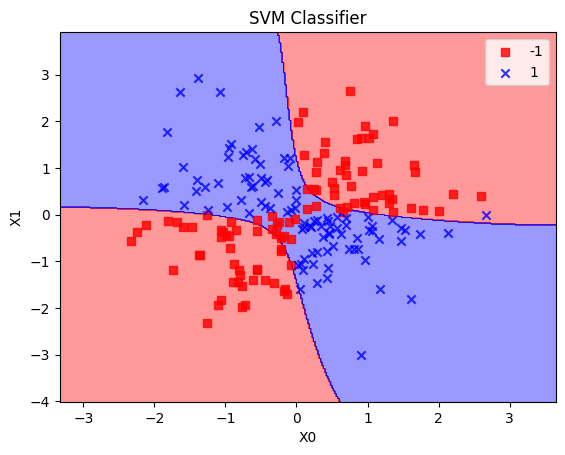

In [25]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', gamma=0.10, C=10.0)
svm.fit(X, y)

plot_decision_regions(X, y, classifier=svm)
plt.legend()
plt.legend()
plt.xlabel('X0')
plt.ylabel('X1')
plt.title('SVM Classifier')

#### K-Nearest Neighbors (KNN)

C:\Users\ellins\AppData\Local\Temp\ipykernel_5384\3281911786.py:22: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


Text(0.5, 1.0, 'KNN Classifier')

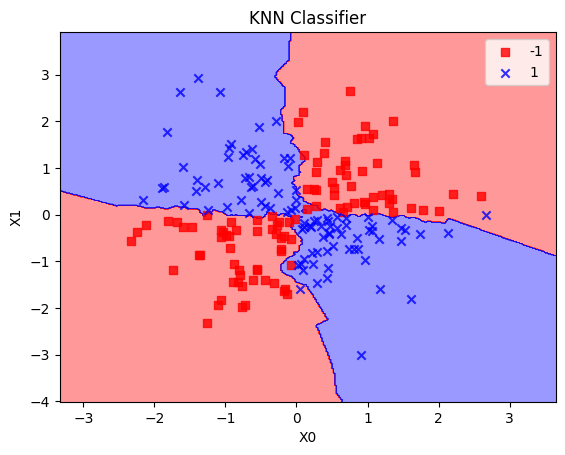

In [26]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, 
                           p=2, 
                           
                           metric = 'minkowski')

knn.fit(X,y)

plot_decision_regions(X,y, classifier=knn)
plt.legend()
plt.legend()
plt.xlabel('X0')
plt.ylabel('X1')
plt.title('KNN Classifier')

#### Test with Circle Data

In [27]:
circle_df = pd.read_csv('Data/circle_data.csv')
circle_df.head()

,x0,x1,y
0,0.342269,0.029534,1
1,0.024359,-0.154659,1
2,-0.786777,-0.757186,-1
3,0.082696,0.192958,1
4,-0.219795,0.233710,1


In [28]:
X = circle_df.loc[:,['x0', 'x1']].values
y = circle_df.loc[:,'y'].values

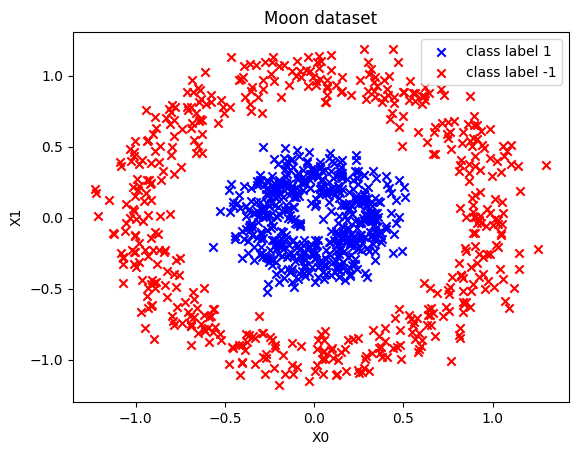

In [29]:
plt.scatter(X[y==1, 0],
            X[y==1, 1],
            c='b', marker='x',
            label = 'class label 1')
plt.scatter(X[y==-1, 0],
            X[y==-1, 1],
            c='r', marker='x',
            label = 'class label -1')

plt.legend()
plt.xlabel('X0')
plt.ylabel('X1')
plt.title('Moon dataset')
plt.show()

##### SVM

C:\Users\ellins\AppData\Local\Temp\ipykernel_5384\3281911786.py:22: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


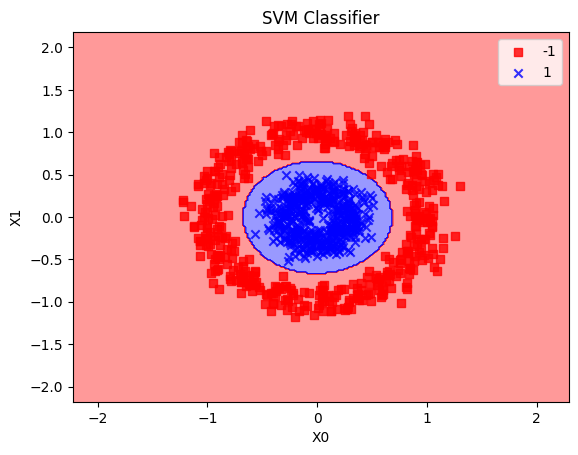

In [30]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', gamma=0.40, C=10.0)
svm.fit(X, y)

plot_decision_regions(X,y,classifier=svm)
plt.legend()
plt.xlabel('X0')
plt.ylabel('X1')
plt.title('SVM Classifier')
plt.show()



##### KNN

C:\Users\ellins\AppData\Local\Temp\ipykernel_5384\3281911786.py:22: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


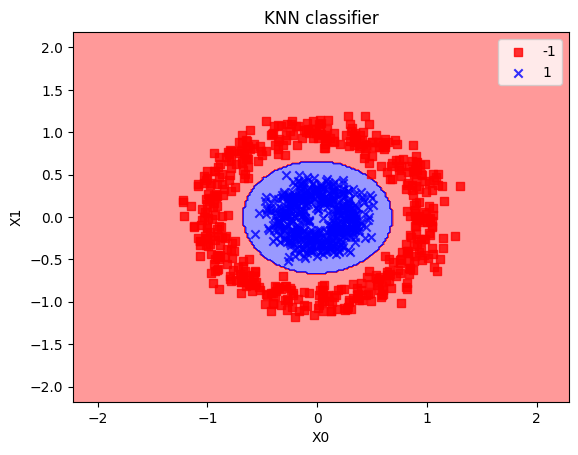

In [31]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, 
                           p=2, 
                           metric='minkowski') # Generalization of Edulidean 
# & Manhattan distance 

svm = SVC(kernel='rbf', gamma=0.40, C=10.0)
svm.fit(X, y)

plot_decision_regions(X,y,classifier=svm)
plt.legend()
plt.xlabel('X0')
plt.ylabel('X1')
plt.title('KNN classifier')
plt.show()

### Home Exercise 